In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
df = pd.read_csv(r'Heart_Disease_Prediction.xls')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270 entries, 0 to 269
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      270 non-null    int64  
 1   Sex                      270 non-null    int64  
 2   Chest pain type          270 non-null    int64  
 3   BP                       270 non-null    int64  
 4   Cholesterol              270 non-null    int64  
 5   FBS over 120             270 non-null    int64  
 6   EKG results              270 non-null    int64  
 7   Max HR                   270 non-null    int64  
 8   Exercise angina          270 non-null    int64  
 9   ST depression            270 non-null    float64
 10  Slope of ST              270 non-null    int64  
 11  Number of vessels fluro  270 non-null    int64  
 12  Thallium                 270 non-null    int64  
 13  Heart Disease            270 non-null    object 
dtypes: float64(1), int64(12), 

In [5]:
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [6]:
df['Heart Disease'] = df['Heart Disease'].replace({'Presence':1,'Absence':0})

In [7]:
df

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
265,52,1,3,172,199,1,0,162,0,0.5,1,0,7,0
266,44,1,2,120,263,0,0,173,0,0.0,1,0,7,0
267,56,0,2,140,294,0,2,153,0,1.3,2,0,3,0
268,57,1,4,140,192,0,0,148,0,0.4,2,0,6,0


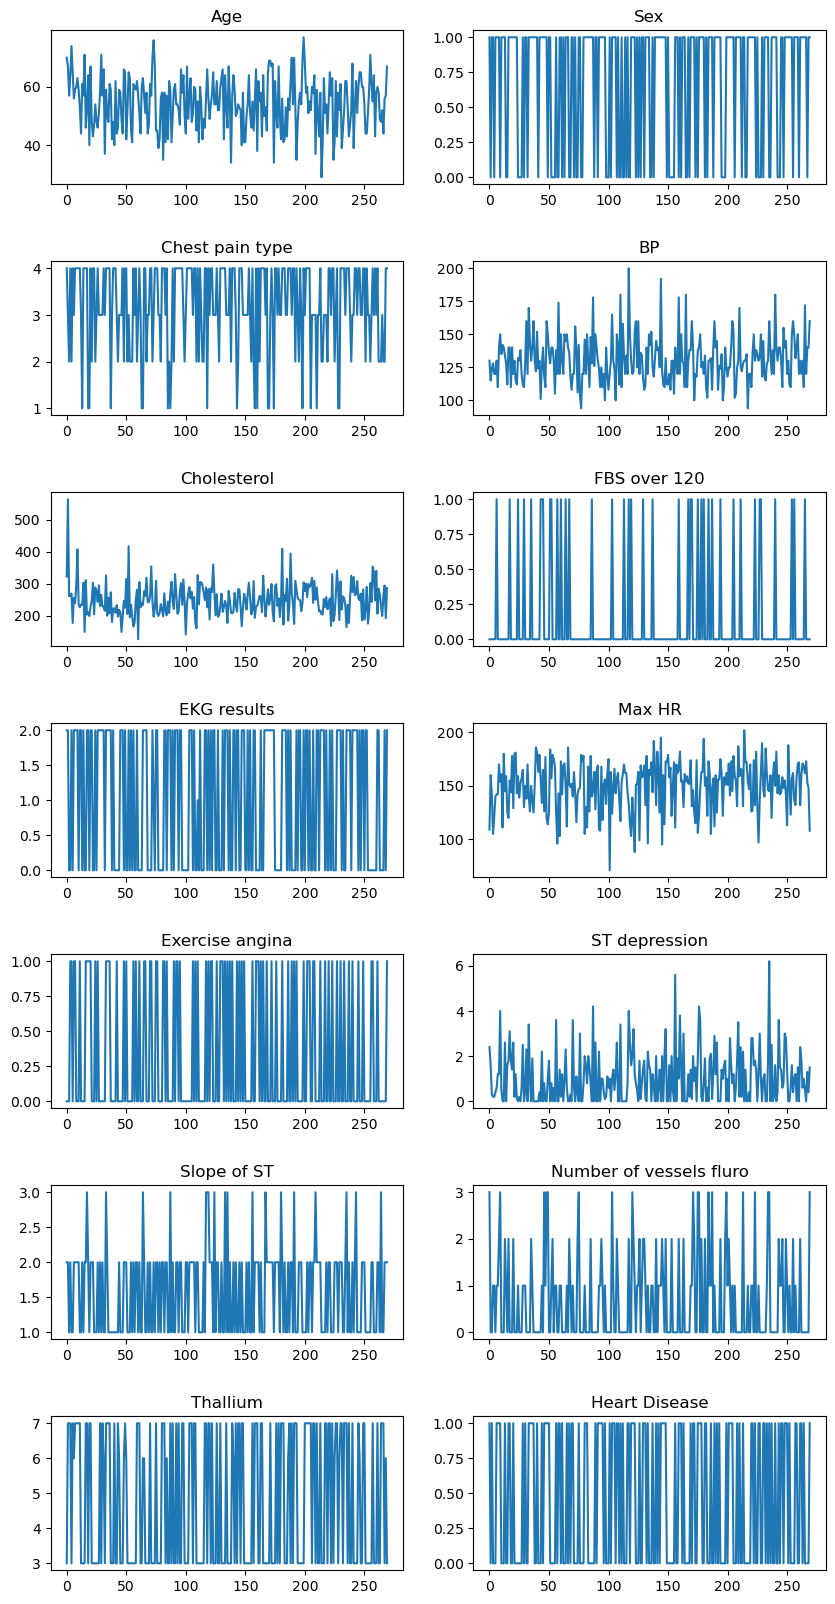

In [8]:
# Create a 7x2 matrix of subplots and plot each column on a separate subplot
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(10, 20))
for i, col in enumerate(df.columns):
    axs[i//2, i%2].plot(df[col])
    axs[i//2, i%2].set_title(col)

# Adjust the space between subplots
plt.subplots_adjust(hspace=0.5)

# Show the plot
plt.show()

<AxesSubplot: >

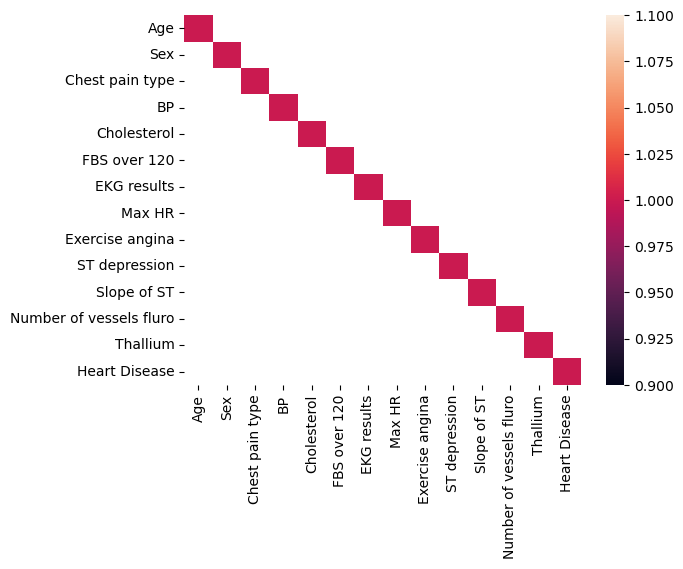

In [9]:
sns.heatmap(df.corr(), mask = abs(df.corr())<0.8)

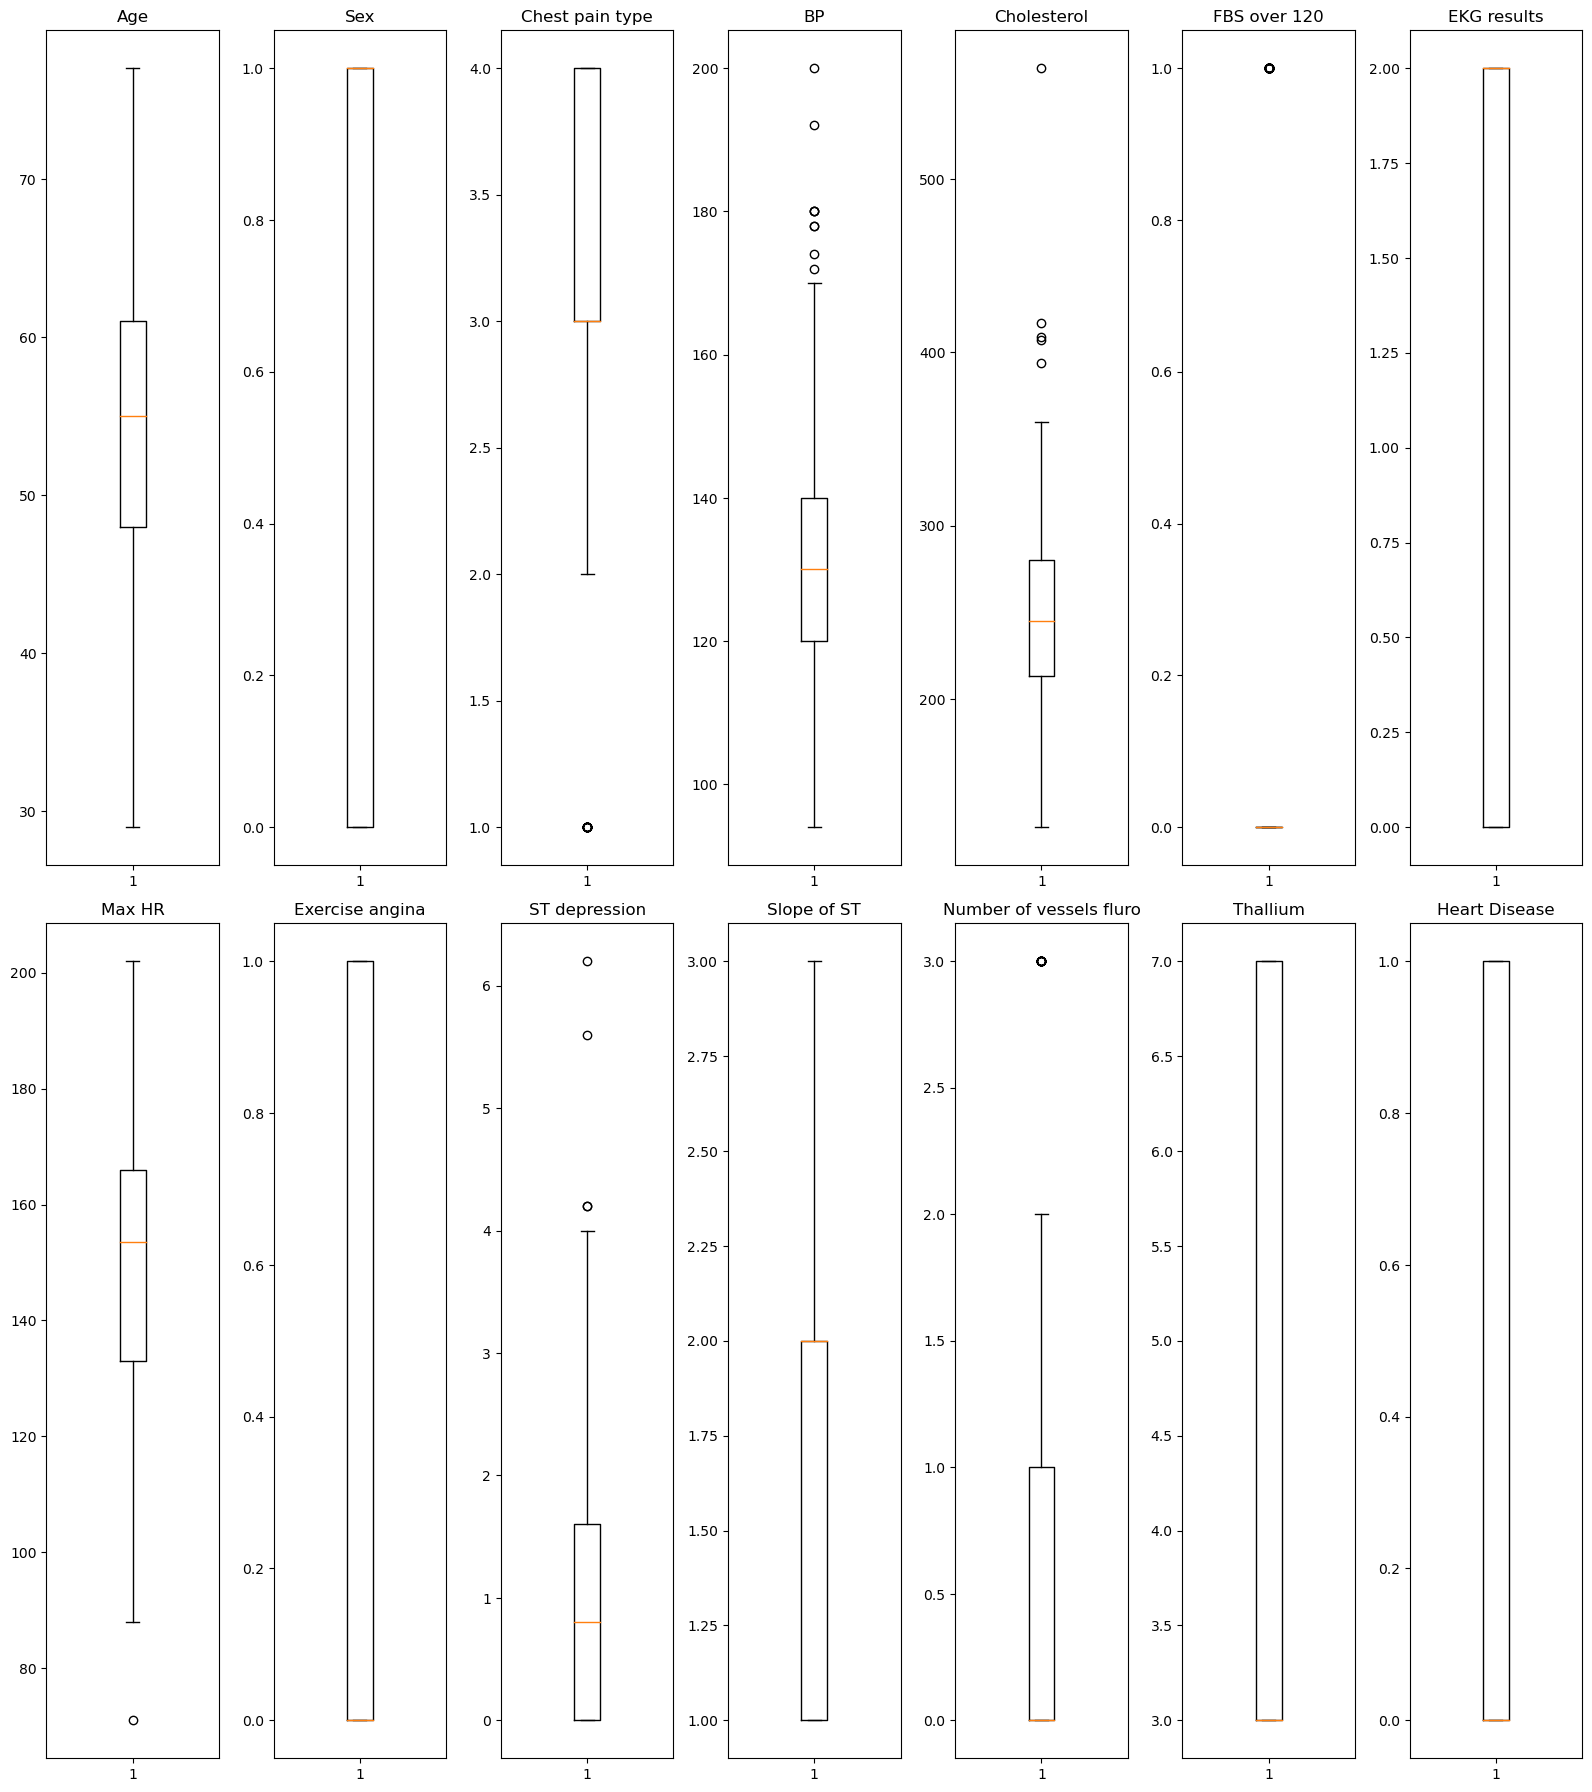

In [10]:
num_cols=df.columns
fig=plt.figure(figsize=(16,18))
for index,col in enumerate(num_cols):
    plt.subplot(2,7,index+1,title=col)
    plt.boxplot(df[col])

fig.tight_layout(pad=1.0)

In [11]:
X = df.drop('Heart Disease',axis =1)
y = df['Heart Disease']

In [12]:
X['intercept'] = 1

In [13]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calculate_vif(X, thresh=5):
    dropped=True
    while dropped:
        dropped=False
        vif=pd.DataFrame()
        vif['variables']=X.columns
        vif['vif']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
        temp=vif.drop(index=len(vif)-1,axis=0)
        temp=temp.sort_values('vif',ascending=False)
        if temp.iloc[0]['vif']>thresh:
            col=temp.iloc[0]['variables']
            X.drop(col,axis=1,inplace=True)
            dropped = True
    
    print("remaining columns: ",X.columns)

In [14]:
calculate_vif(X,3)

remaining columns:  Index(['Age', 'Sex', 'Chest pain type', 'BP', 'Cholesterol', 'FBS over 120',
       'EKG results', 'Max HR', 'Exercise angina', 'ST depression',
       'Slope of ST', 'Number of vessels fluro', 'Thallium', 'intercept'],
      dtype='object')


In [15]:
X = X.drop('intercept',axis = 1)

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, stratify = y)

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

In [37]:
# Define the parameter grid
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

# Create a decision tree classifier
dt = DecisionTreeClassifier(random_state=42)

# Create a GridSearchCV object
grid_search = GridSearchCV(estimator=dt, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train.values, y_train.values)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]})

In [38]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 2}

In [39]:
model = grid_search.best_estimator_

In [41]:
pred = model.predict(X_test.values)

In [42]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [43]:
accuracy_score(y_test,pred)

0.8111111111111111

In [44]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.84      0.82      0.83        50
           1       0.78      0.80      0.79        40

    accuracy                           0.81        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.81      0.81      0.81        90



In [45]:
confusion_matrix(y_test,pred)

array([[41,  9],
       [ 8, 32]])

In [27]:
import pickle

In [46]:
pickle.dump(model, open('dtmodel.pkl', 'wb'))

In [51]:
model.predict(X_train.iloc[0].values.reshape(1,-1))

array([0])

In [49]:
X_train.iloc[0].values

array([ 44.,   1.,   3., 120., 226.,   0.,   0., 169.,   0.,   0.,   1.,
         0.,   3.])